In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming you have your dataset in a CSV file named 'youtube_songs_data.csv'
file_path = '/content/songs.xlsx'

# Load the dataset into a pandas DataFrame
df = pd.read_excel(file_path)

In [ ]:
# Display the first few rows to understand the structure
print(df.head())

   Unnamed: 0     video_id channelTitle  \
0           0  F44TK5EHCRo     T-Series   
1           1  adx8Rsjp-c0     T-Series   
2           2  36nQLyrR7Sw     T-Series   
3           3  TKbifi5AMQo     T-Series   
4           4  NNA21SoGqss     T-Series   

                                               title  \
0  RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...   
1  TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...   
2  ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...   
3  HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...   
4  Har Har Mahadev (Lyrical Video): Sachet Tandon...   

                                         description  \
0  Presenting the song "RAFTA RAFTA (Lo-Fi Mix)" ...   
1  Presenting the song "TUM HO MERA PYAR (Lo-Fi M...   
2  Presenting the song "ISHQ HOTHON SE (Lo-Fi Mix...   
3  Presenting the song "HUMKO PYAR HUA (Lo-Fi Mix...   
4  T-Series Presents "Har Har Mahadev (Lyrical Vi...   

                                                tags           publ

In [ ]:
df.shape

(19345, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [ ]:
# Data Cleaning (if needed)
# Example: Convert 'publishedAt' to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Unnamed: 0     19345 non-null  int64              
 1   video_id       19345 non-null  object             
 2   channelTitle   19345 non-null  object             
 3   title          19345 non-null  object             
 4   description    19342 non-null  object             
 5   tags           19345 non-null  object             
 6   publishedAt    19345 non-null  datetime64[ns, UTC]
 7   viewCount      19345 non-null  int64              
 8   likeCount      19345 non-null  int64              
 9   favoriteCount  19345 non-null  int64              
 10  commentCount   19345 non-null  int64              
 11  duration       19345 non-null  object             
 12  definition     19345 non-null  object             
 13  caption        19345 non-null  bool           

In [ ]:
df.isnull().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Data Exploration
# Example: Top channels by number of videos
top_channels = df['channelTitle'].value_counts().nlargest(10)
print("Top Channels by Number of Videos:")
print(top_channels)

Top Channels by Number of Videos:
channelTitle
T-Series    19345
Name: count, dtype: int64


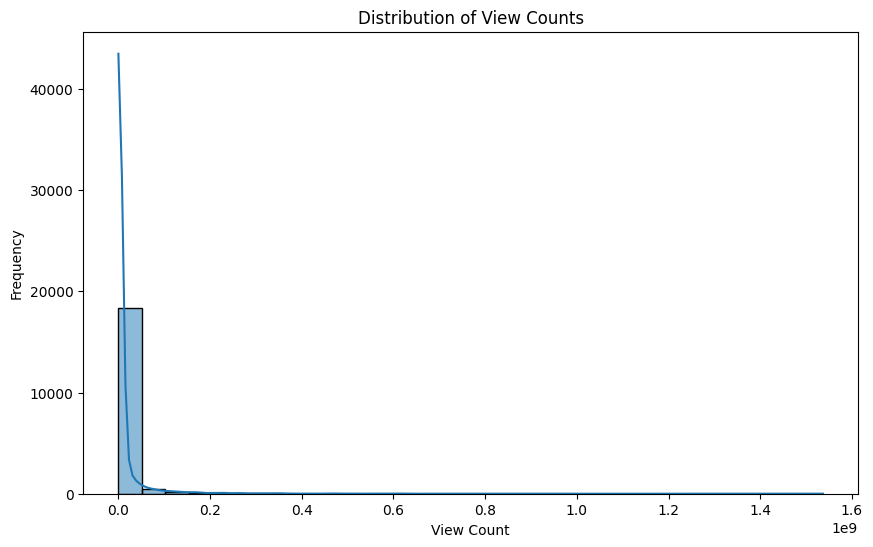

In [ ]:
# Example: Visualize distribution of views using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['viewCount'], bins=30, kde=True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

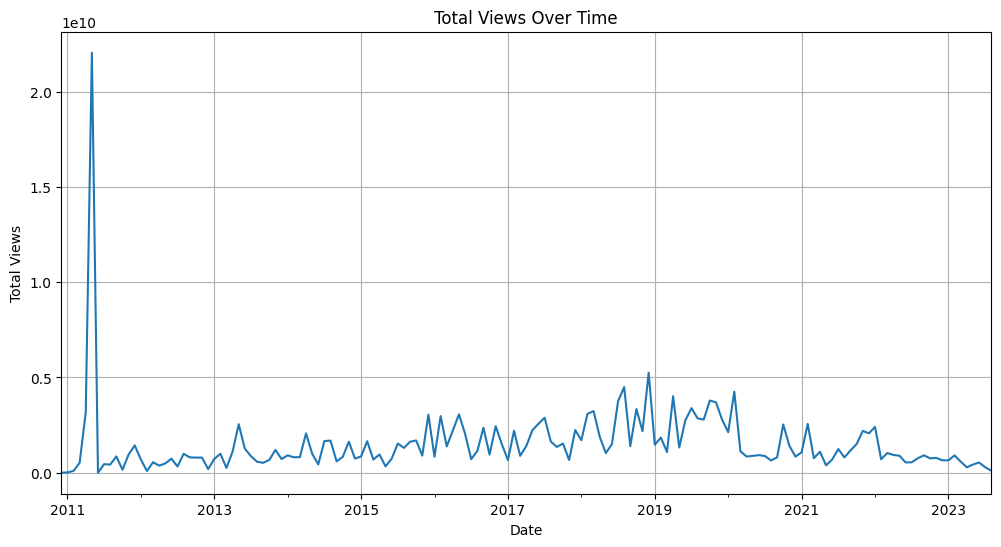

In [ ]:
# Example: Time series analysis of views over time
df.set_index('publishedAt', inplace=True)
views_over_time = df['viewCount'].resample('M').sum()  # Resample by month and sum views
plt.figure(figsize=(12, 6))
views_over_time.plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.show()

In [ ]:
numeric_columns = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors='coerce' to handle non-numeric values

# Drop rows with NaN values in numeric columns (optional, based on how you want to handle missing data)
df.dropna(subset=numeric_columns, inplace=True)

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
object_columns = df.select_dtypes(include=['object']).columns


In [ ]:
df_numerical = df[numerical_columns]

In [ ]:
df_object=df[object_columns]

In [ ]:
df_scaled = pd.concat([df_numerical,df_object], axis=1)

In [ ]:
df_scaled.columns

Index(['Unnamed: 0', 'viewCount', 'likeCount', 'favoriteCount', 'commentCount',
       'video_id', 'channelTitle', 'title', 'description', 'tags', 'duration',
       'definition'],
      dtype='object')

In [ ]:
df_scaled

,Unnamed: 0,viewCount,likeCount,favoriteCount,commentCount,video_id,channelTitle,title,description,tags,duration,definition
publishedAt,,,,,,,,,,,,
2023-08-20 12:30:08+00:00,0,7299,241,0,59,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",PT4M42S,hd
2023-08-20 10:30:01+00:00,1,4212,144,0,32,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",PT5M27S,hd
2023-08-20 09:30:00+00:00,2,2849,79,0,31,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",PT6M10S,hd
2023-08-20 07:30:05+00:00,3,3991,116,0,36,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",PT5M59S,hd
2023-08-20 05:30:06+00:00,4,101950,6230,0,434,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",PT3M37S,hd
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-20 13:34:53+00:00,19340,636734,943,0,18,aouxczBof58,T-Series,ROLA PE GAYA FULL SONG| PATIALA HOUSE | AKSHA...,"Watch the song ""Rola Pe Gaya"" from the movie '...","['Rola Pe Gaya', 'Anushka Sharma', 'Patiala Ho...",PT1M31S,hd
2011-01-13 11:27:42+00:00,19341,86841,1084,0,4,NPhY3g0WE8c,T-Series,Patiala House-Official Trailer II,Patiala house upcoming movie official trailer,"['new songs', 'official trailer', 'Songs', 'Di...",PT3M32S,sd
2011-01-07 09:36:16+00:00,19342,364995,1865,0,30,ZVYTLHLpgAw,T-Series,Kyun Mein Jagoon Song (Patiala House ) | Aksha...,"""Here's presenting the song """"Kyun Main Jagoon...","['film songs', 'songs', 'bollywood song', 'anu...",PT1M46S,sd


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df_scaled=scaler.fit_transform(object_columns)
df_scaled

array([6, 0, 5, 2, 4, 3, 1])

In [ ]:
df_scaled1=pd.DataFrame(df_scaled)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)

In [ ]:
df_scaled = pd.concat([df_numerical_scaled, df_scaled1], axis=1)

In [ ]:
df_scaled

,Unnamed: 0,viewCount,likeCount,favoriteCount,commentCount,0
0,-1.731961,-0.217527,-0.240832,0.0,-0.206379,6.0
1,-1.731782,-0.217583,-0.241101,0.0,-0.208541,0.0
2,-1.731603,-0.217608,-0.241281,0.0,-0.208621,5.0
3,-1.731424,-0.217587,-0.241178,0.0,-0.208221,2.0
4,-1.731245,-0.215801,-0.224242,0.0,-0.176347,4.0
...,...,...,...,...,...,...
19340,1.731245,-0.206051,-0.238887,0.0,-0.209662,NaN
19341,1.731424,-0.216076,-0.238497,0.0,-0.210784,NaN
19342,1.731603,-0.211005,-0.236333,0.0,-0.208701,NaN
19343,1.731782,0.031458,-0.054987,0.0,-0.012255,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns=numerical_columns)

ValueError: could not convert string to float: 'F44TK5EHCRo'

In [ ]:
# Recommendations and Conclusion
# Example: Calculate engagement metrics
df['engagement_rate'] = df['likeCount'] / df['viewCount']
avg_engagement_rate = df['engagement_rate'].mean()
print(f"Average Engagement Rate: {avg_engagement_rate}")

Average Engagement Rate: inf


In [ ]:
songs=df.to_csv('processed_Tseries_songs.csv', index=False)

In [ ]:
import pandas as pd
data=pd.read_csv("/content/processed_Tseries_songs.csv")

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.
